In [1]:
# importing necessary dependencies

import seaborn as sns
sns.set(style='ticks')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading out dataset form the previous ipynb

df = pd.read_csv('cleaned_drug_data.csv')
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,576.742,5.28050,1,8,6.892790
1,1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,562.715,5.03450,1,8,6.657577
2,4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,inactive,493.615,4.59032,2,7,4.522879
3,5,CHEMBL124035,COCCOc1cc2ncnc(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC...,active,495.580,3.80490,1,8,6.346787
4,6,CHEMBL125898,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,active,564.687,3.88080,1,9,7.397940


In [3]:
list(df.columns)

['Unnamed: 0',
 'molecule_chembl_id',
 'canonical_smiles',
 'bioactivity',
 'MW',
 'LogP',
 'NumHDonors',
 'NumHAcceptors',
 'pIC50']

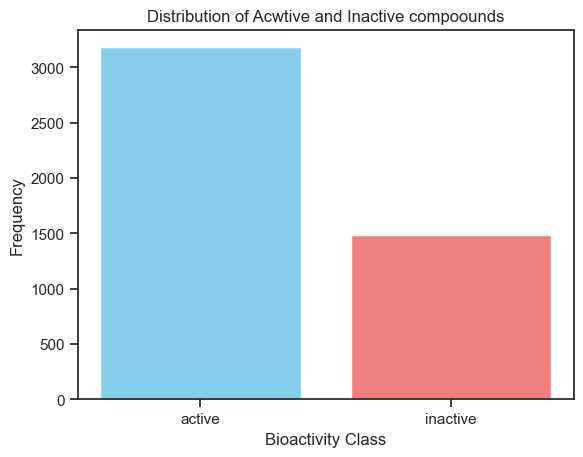

In [4]:
# 1. Get the frequency of each bioactivity class

bioactivity_counts = df['bioactivity'].value_counts()

# 2. Extract the classes (for x-axis) and frequencies (for y-axis)
bioactivity_classes = bioactivity_counts.index
frequencies = bioactivity_counts.values
    
plt.bar(bioactivity_classes, frequencies, color=['skyblue', 'lightcoral'])

plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.title('Distribution of Acwtive and Inactive compoounds')
plt.xticks(rotation=0) #keeps the labels horizontal

plt.show()


Text(0.5, 1.0, 'Scatter plot of LogP against Molecular Weight')

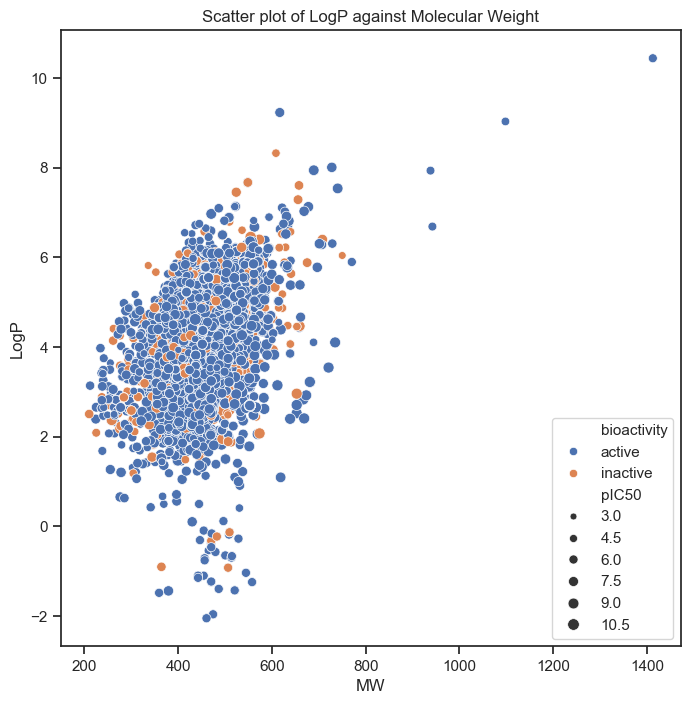

In [12]:
#scatter plot using sns

plt.figure(figsize=(8,8))

sns.scatterplot(x='MW', y= 'LogP', data=df, hue = 'bioactivity', size='pIC50')
plt.xlabel('MW')
plt.ylabel('LogP')
plt.title('Scatter plot of LogP against Molecular Weight')



Text(0.5, 1.0, 'Boxplot of bioactivity and pIC50 ')

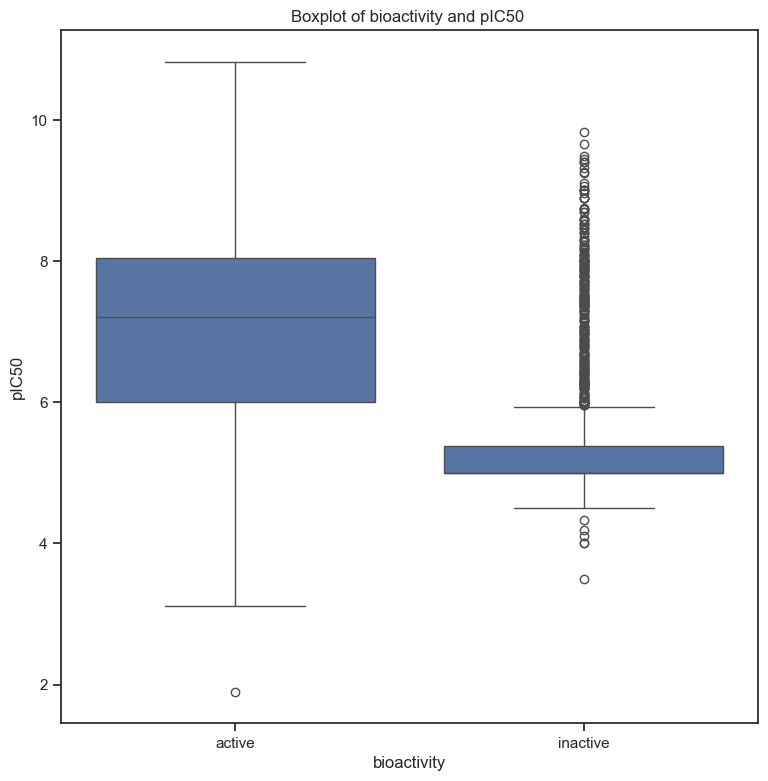

In [13]:
#creating a boxplot

plt.figure(figsize=(9,9))

sns.boxplot(x='bioactivity', y='pIC50', data=df)
plt.xlabel('bioactivity') 
plt.ylabel('pIC50')
plt.title('Boxplot of bioactivity and pIC50 ')